## Advanced Regression Assignment - House Price Estimation

US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

##### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

#### The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 800)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams['figure.figsize'] = (15, 8)
sns.set(style="dark")
sns.set_palette('tab10')

### Loading the Data

In [2]:
#reading the data and looking at first 5 rows
houses = pd.read_csv("train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#checking the number of rows and columns in data
houses.shape

(1460, 81)

In [4]:
#looking at info about data
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- We have 43 categorical variables and 38 numerical variables.

In [5]:
#looking at statistical summary
houses.describe(percentiles = [0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.99, 1]).T

,count,mean,std,min,25%,50%,75%,80%,90%,95%,99%,100%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1168.200,1314.100,1387.050,1445.410,1460.000,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,80.000,120.000,160.000,190.000,190.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,85.000,96.000,107.000,141.000,313.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,12205.800,14381.700,17401.150,37567.640,215245.000,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,7.000,8.000,8.000,10.000,10.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,7.000,7.000,8.000,9.000,9.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2003.000,2006.000,2007.000,2009.000,2010.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2005.000,2006.000,2007.000,2009.000,2010.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,206.000,335.000,456.000,791.920,1600.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,806.400,1065.500,1274.000,1572.410,5644.000,5644.000


### Treating Missing Values

In [6]:
#checking for null values
houses.isnull().sum().sort_values(ascending=False)[(houses.isnull().sum()) > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [7]:
#let's look at the columns which have missing values in %
(houses.isnull().sum() / houses.shape[0]* 100).sort_values(ascending=False)[(houses.isnull().sum() / houses.shape[0]* 100) > 0]

PoolQC         99.521
MiscFeature    96.301
Alley          93.767
Fence          80.753
FireplaceQu    47.260
LotFrontage    17.740
GarageCond      5.548
GarageType      5.548
GarageYrBlt     5.548
GarageFinish    5.548
GarageQual      5.548
BsmtExposure    2.603
BsmtFinType2    2.603
BsmtFinType1    2.534
BsmtCond        2.534
BsmtQual        2.534
MasVnrArea      0.548
MasVnrType      0.548
Electrical      0.068
dtype: float64

There are 19 columns with missing values. 

In [8]:
#The missing values in the features like BsmtExposure, GarageQual suggests the (using data dictionary) absence of mentioned feature. We need to impute it with "None" / "No __feature_name__"
houses["PoolQC"] = houses["PoolQC"].fillna("No Pool")
houses["MiscFeature"] = houses["MiscFeature"].fillna("None")
houses["Alley"] = houses["Alley"].fillna("No Alley Access")
houses["Fence"] = houses["Fence"].fillna("No Fence")
houses["FireplaceQu"] = houses["FireplaceQu"].fillna("No Fireplace")
houses["MasVnrType"] = houses["MasVnrType"].fillna("None")
houses["GarageCond"] = houses["GarageCond"].fillna("None")
houses["GarageType"] = houses["GarageType"].fillna("None")
houses["GarageFinish"] = houses["GarageFinish"].fillna("None")
houses["GarageQual"] = houses["GarageQual"].fillna("No Garage")
houses["BsmtExposure"] = houses["BsmtExposure"].fillna("No Basement")
houses["BsmtFinType1"] = houses["BsmtFinType1"].fillna("None")
houses["BsmtFinType2"] = houses["BsmtFinType2"].fillna("None")
houses["BsmtCond"] = houses["BsmtCond"].fillna("None")
houses["BsmtQual"] = houses["BsmtQual"].fillna("None")

#Imputing the missing values by median/mode (according to data type) to remaining features
houses["LotFrontage"] = houses["LotFrontage"].fillna(houses["LotFrontage"].median())
houses["GarageYrBlt"] = houses["GarageYrBlt"].fillna(houses["GarageYrBlt"].median())
houses["MasVnrArea"] = houses["MasVnrArea"].fillna(houses["MasVnrArea"].median())
houses["Electrical"] = houses["Electrical"].fillna(houses["Electrical"].mode()[0])

In [9]:
#let's check again if missing values are present
houses.isnull().sum()[(houses.isnull().sum() / houses.shape[0]* 100) > 0]

Series([], dtype: int64)

There are no missing values present in the data.

In [10]:
houses.duplicated()[(houses.duplicated()) == True]

Series([], dtype: bool)

There are no duplicate values present in the data.

In [11]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAr

In [12]:
#Id is not helpful for the analysis, so let's drop the Id column
houses = houses.drop("Id", axis = 1)

In [13]:
cat_cols = houses.select_dtypes(include = "object")
cat_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [14]:
for col in cat_cols:
    print(houses[col].value_counts(normalize = True) * 100)
    print()

RL        78.836
RM        14.932
FV         4.452
RH         1.096
C (all)    0.685
Name: MSZoning, dtype: float64

Pave   99.589
Grvl    0.411
Name: Street, dtype: float64

No Alley Access   93.767
Grvl               3.425
Pave               2.808
Name: Alley, dtype: float64

Reg   63.356
IR1   33.151
IR2    2.808
IR3    0.685
Name: LotShape, dtype: float64

Lvl   89.795
Bnk    4.315
HLS    3.425
Low    2.466
Name: LandContour, dtype: float64

AllPub   99.932
NoSeWa    0.068
Name: Utilities, dtype: float64

Inside    72.055
Corner    18.014
CulDSac    6.438
FR2        3.219
FR3        0.274
Name: LotConfig, dtype: float64

Gtl   94.658
Mod    4.452
Sev    0.890
Name: LandSlope, dtype: float64

NAmes     15.411
CollgCr   10.274
OldTown    7.740
Edwards    6.849
Somerst    5.890
Gilbert    5.411
NridgHt    5.274
Sawyer     5.068
NWAmes     5.000
SawyerW    4.041
BrkSide    3.973
Crawfor    3.493
Mitchel    3.356
NoRidge    2.808
Timber     2.603
IDOTRR     2.534
ClearCr    1.918
StoneB

In [15]:
#Following are the columns with more than 95% single values, we will drop the columns.
cols = ["Street", "Utilities", "Condition2", "RoofMatl", "Heating"]
houses = houses.drop(cols, axis=1)

In [16]:
cat_cols.drop(cols, axis=1, inplace=True)

In [17]:
def cat_boxplot(x):
    data = houses.copy()
    sns.boxplot(x = x, y = "SalePrice", data = data)

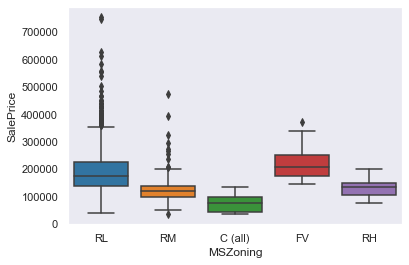

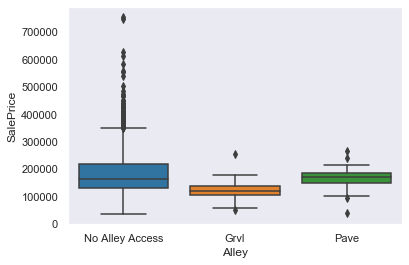

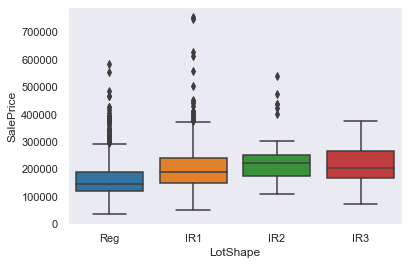

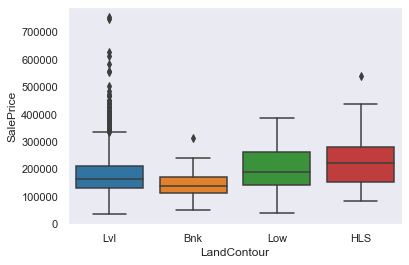

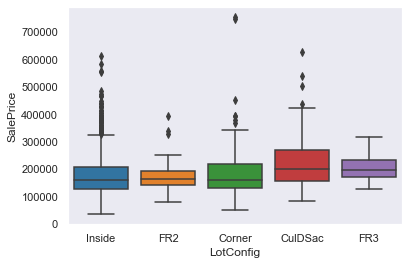

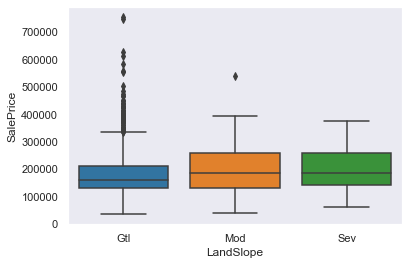

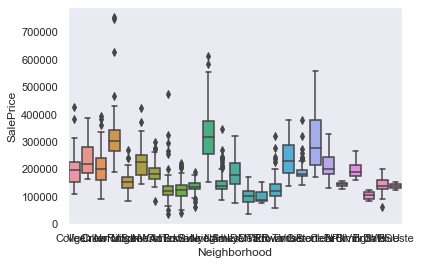

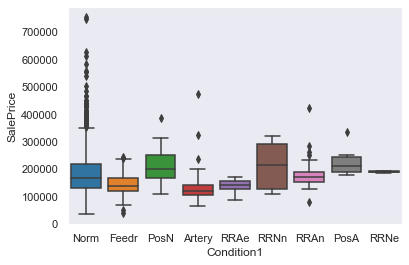

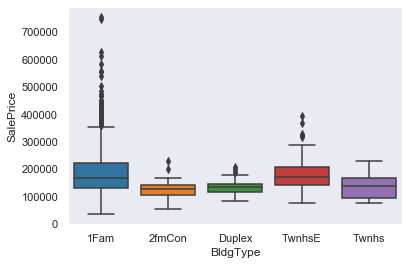

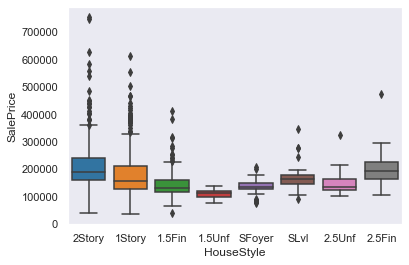

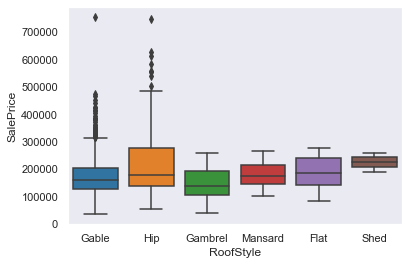

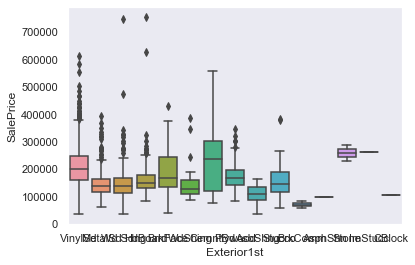

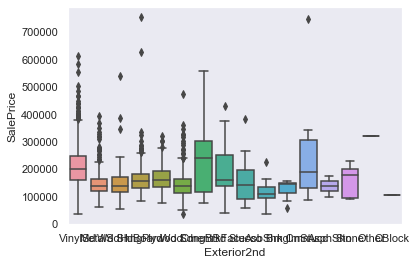

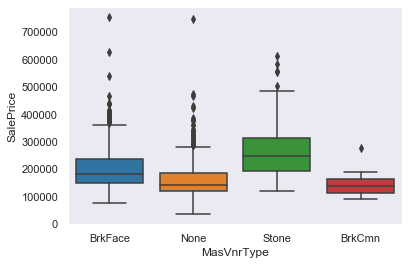

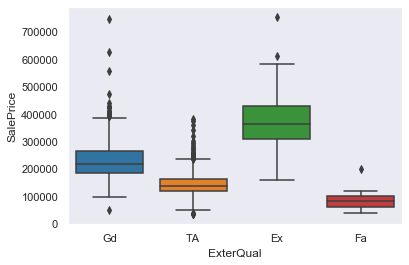

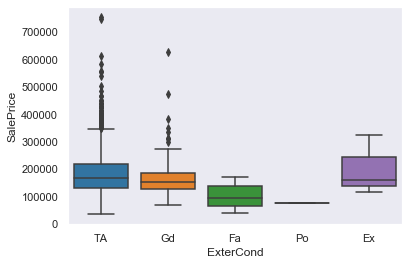

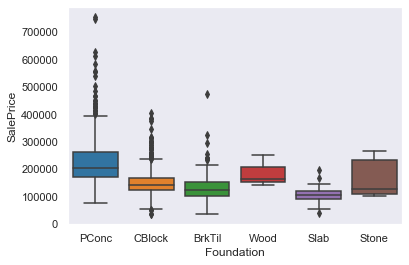

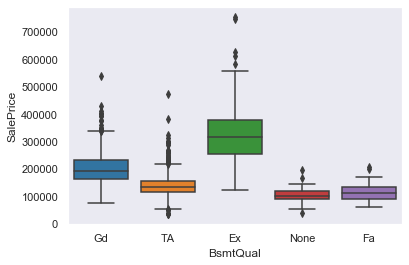

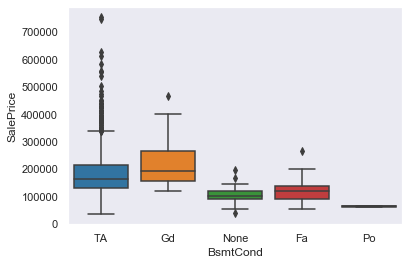

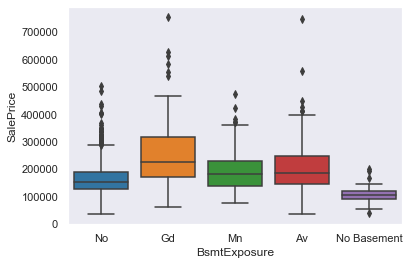

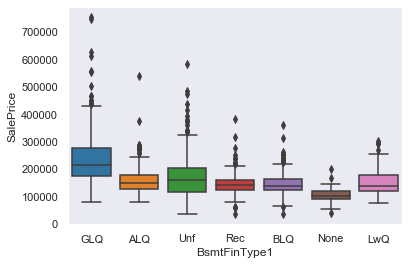

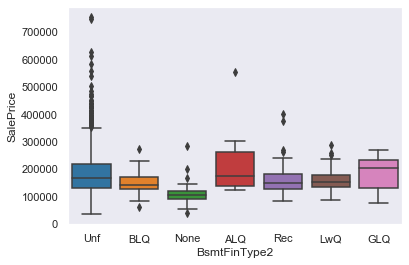

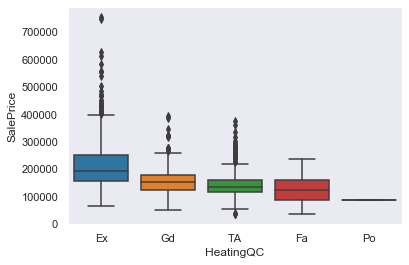

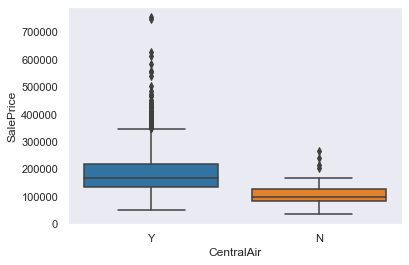

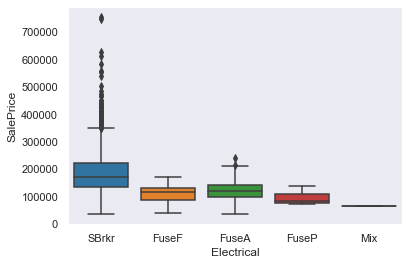

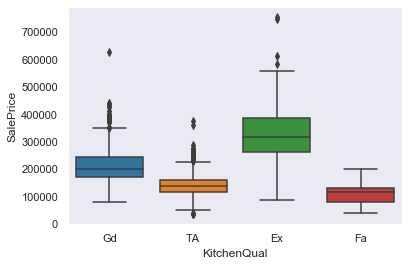

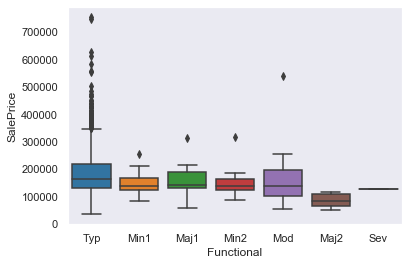

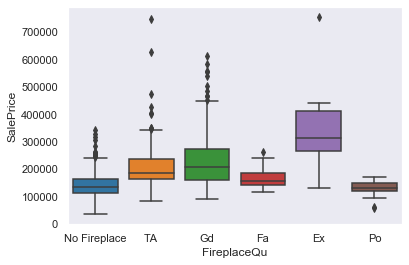

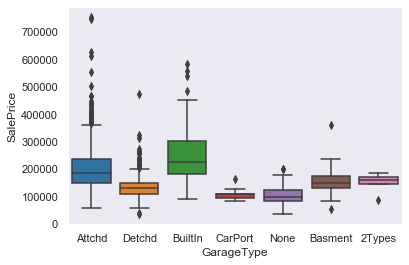

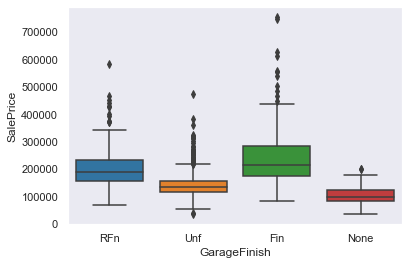

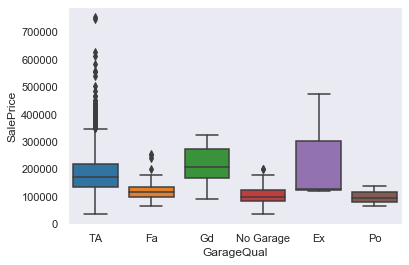

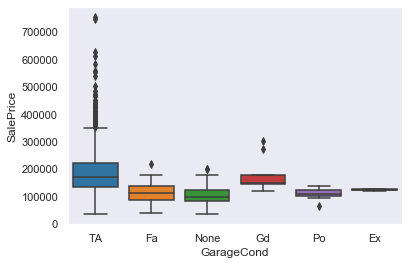

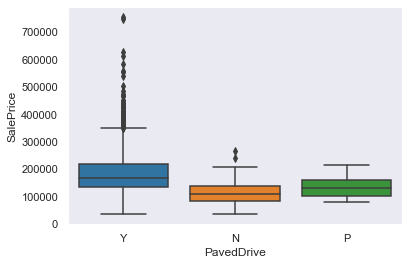

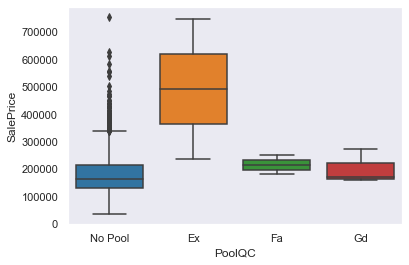

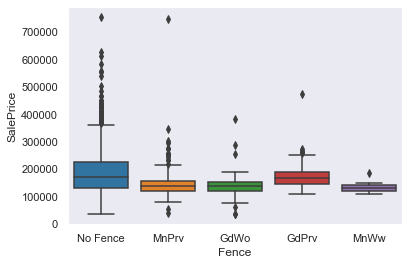

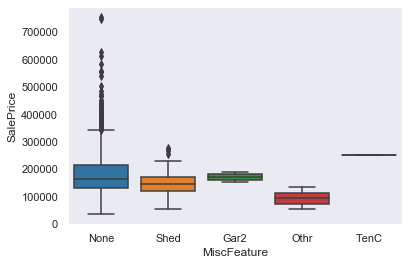

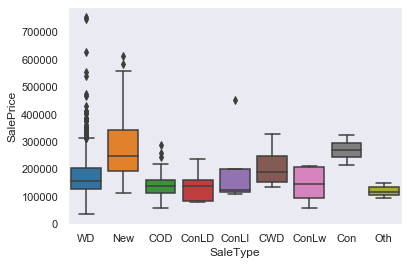

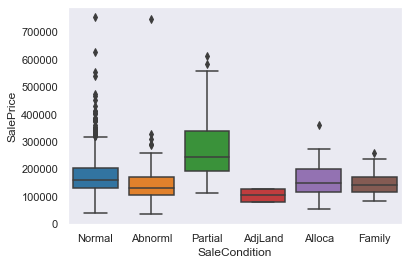

In [18]:
for col in cat_cols:
    plt.subplots()
    cat_boxplot(col)

### **Sale price** is high if:
- Zoning is Residential Low Density
- Shape of property is regular and slightly irregular
- General condition is normal
- Dwelling type is single family detached
- House style is 2Story or 1Story
- roof style is Gable or Hip
- Masonry veneer type is Brick Face or Stone
- If Basement, Garage, External quality and condition  is good or excellent.
    - 

In [19]:
num_cols = houses.select_dtypes(exclude = "object")
num_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [20]:
def num_boxplot(y):
    data = houses.copy()
    sns.boxplot(y = data[y])

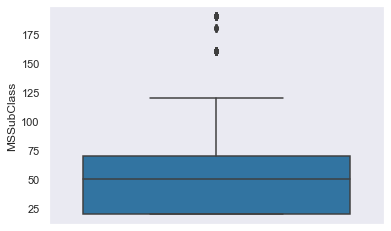

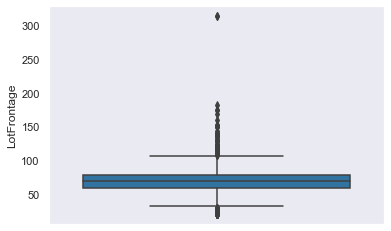

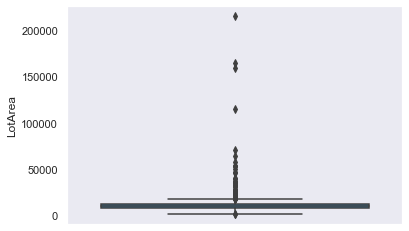

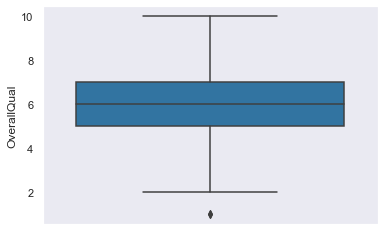

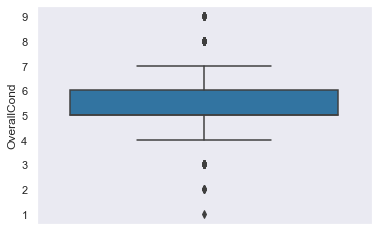

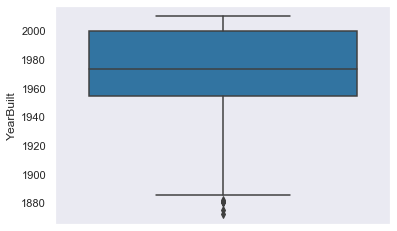

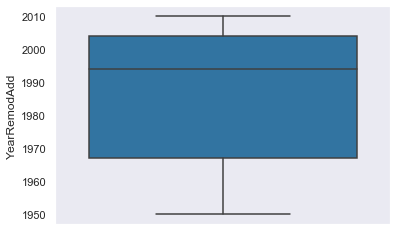

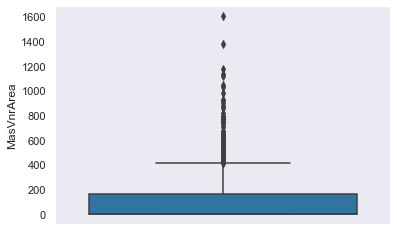

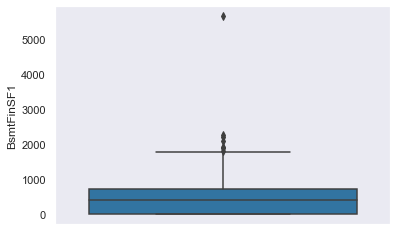

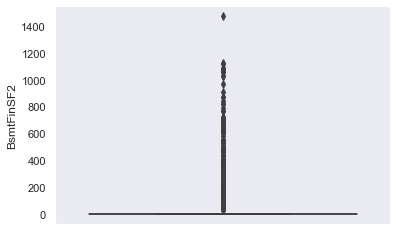

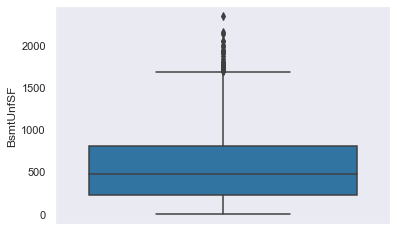

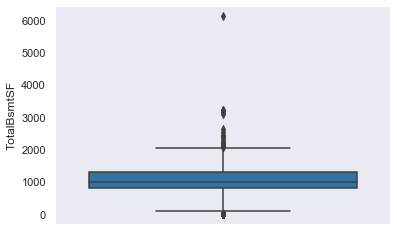

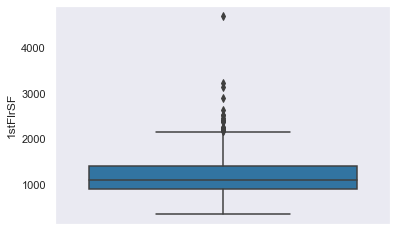

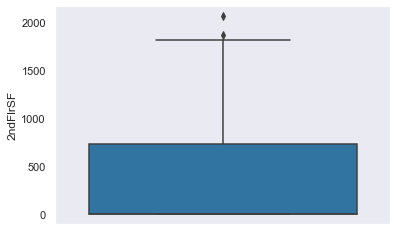

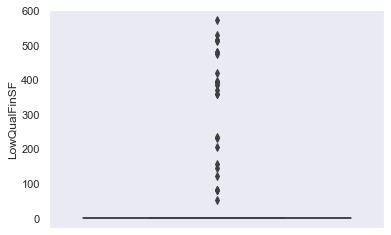

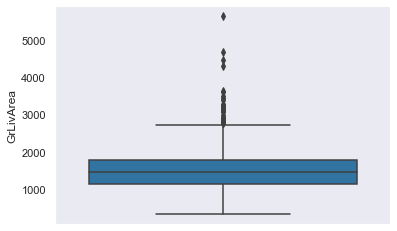

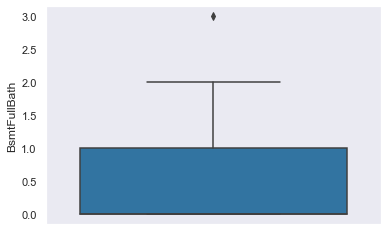

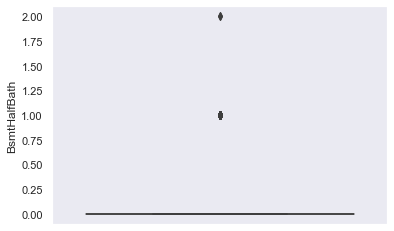

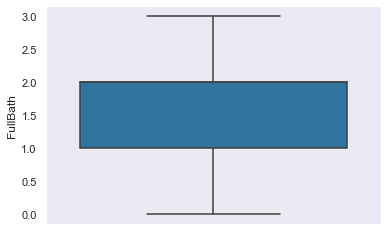

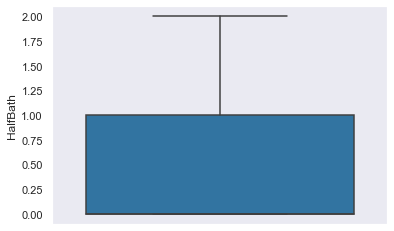

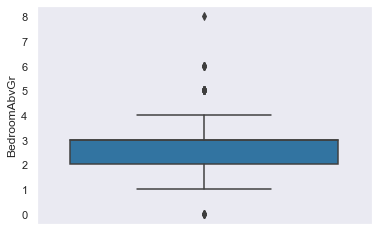

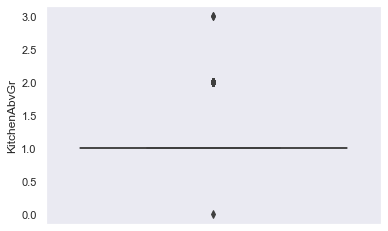

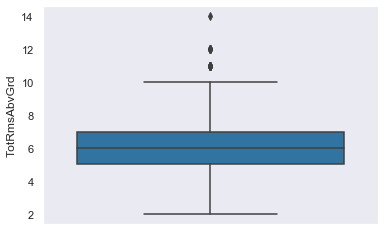

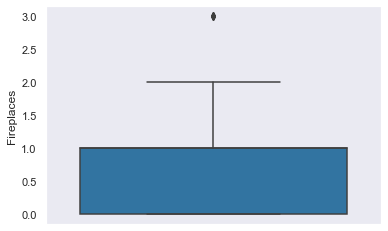

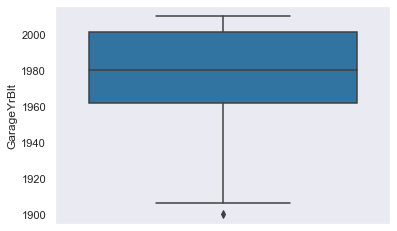

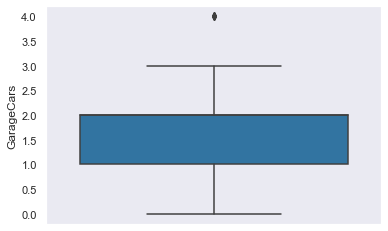

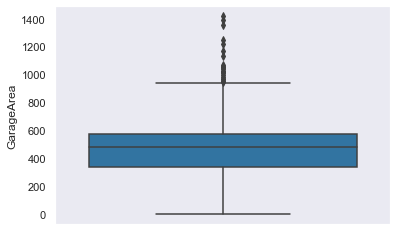

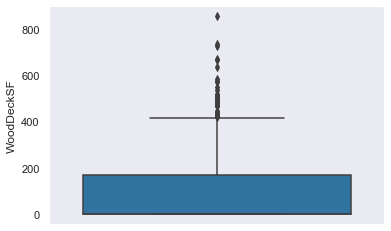

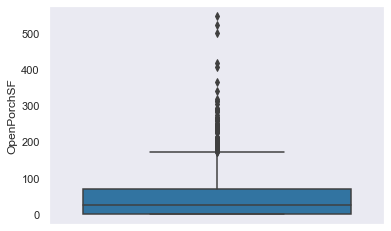

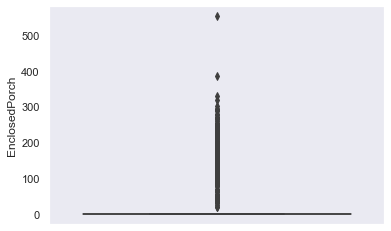

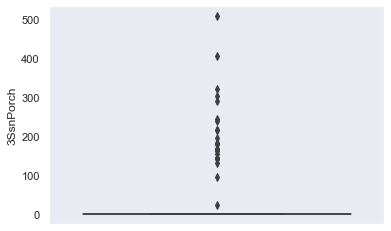

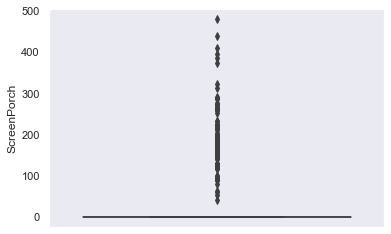

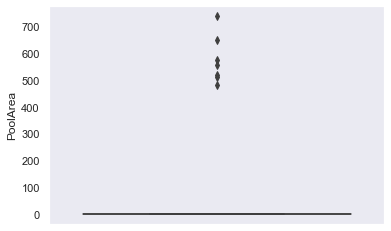

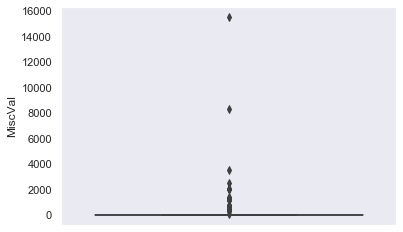

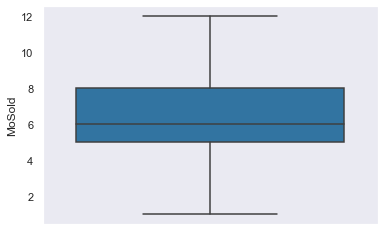

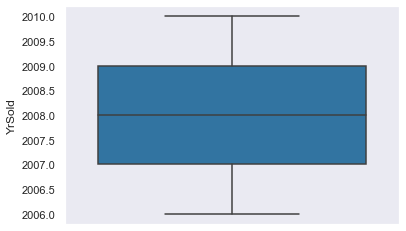

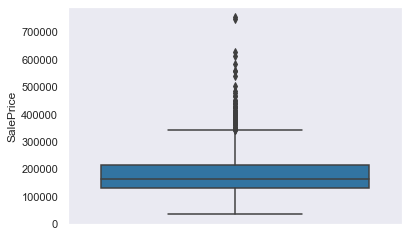

In [21]:
for col in num_cols:
    plt.subplots()
    num_boxplot(col)

From the above boxplots, we can clearly see the presence of outliers. Let's treat them accordingly.

In [22]:
houses.describe(percentiles = [0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.99, 1]).T

,count,mean,std,min,25%,50%,75%,80%,90%,95%,99%,100%,max
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,80.000,120.000,160.000,190.000,190.000,190.000
LotFrontage,1460.000,69.864,22.028,21.000,60.000,69.000,79.000,80.000,92.000,104.000,137.410,313.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,12205.800,14381.700,17401.150,37567.640,215245.000,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,7.000,8.000,8.000,10.000,10.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,7.000,7.000,8.000,9.000,9.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2003.000,2006.000,2007.000,2009.000,2010.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2005.000,2006.000,2007.000,2009.000,2010.000,2010.000
MasVnrArea,1460.000,103.117,180.731,0.000,0.000,0.000,164.250,205.200,335.000,456.000,791.280,1600.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,806.400,1065.500,1274.000,1572.410,5644.000,5644.000
BsmtFinSF2,1460.000,46.549,161.319,0.000,0.000,0.000,0.000,0.000,117.200,396.200,830.380,1474.000,1474.000


In [23]:
def remove_outliers(data):
    cols  = ["LotArea", "MasVnrArea", "BsmtFinSF1", "TotalBsmtSF", "GrLivArea", "TotalPorch"]
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.99) #using 0.99 as we see there are outliers after the 99th percentile
        IQR = q3 - q1
        low_bnd = q1 - (1.5 * IQR)
        upp_bnd = q3 + (1.5 * IQR)
        data = data[((data[col] >= low_bnd) & (data[col] <= upp_bnd))]
        return data

In [24]:
houses = remove_outliers(houses)
houses.shape

(1456, 75)

In [25]:
#deriving the age of house, garage and remodelling from the features present in data
houses["HouseAge"] = houses["YearBuilt"].max() - houses["YearBuilt"]
houses["HouseRemodAge"] = houses["YearRemodAdd"].max() - houses["YearRemodAdd"]
houses["GarageAge"] = houses["GarageYrBlt"].max() - houses["GarageYrBlt"]
houses["YrSold"] = houses["YrSold"].max() - houses["YrSold"]

In [26]:
def map_qual(x):
    return x.map({10 : "Excellent", 9 : "Excellent", 8 : "Good", 7 : "Good", 6 : "Average", 5 : "Average", 4 : "Poor", 3 : "Poor", 2 : "Very Poor", 1 : "Very Poor"})

houses["OverallQual"] = houses[["OverallQual"]].apply(map_qual)
houses["OverallCond"] = houses[["OverallCond"]].apply(map_qual)

In [27]:
#Now, let's drop the original features as they will cause multicollinearity
cols = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]
houses = houses.drop(cols, axis = 1)
num_cols = num_cols.drop(cols, axis = 1)

In [28]:
num_cols = houses.select_dtypes(exclude = "object")

def scatterplot(x):
    data = houses.copy()
    sns.scatterplot(x = x, y = "SalePrice", data = data)

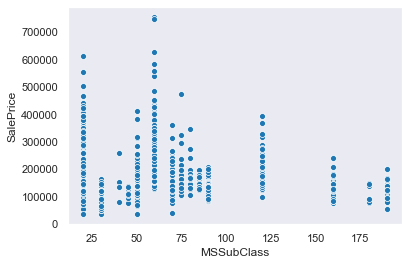

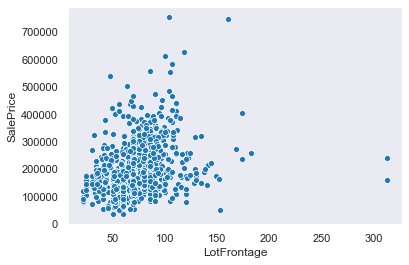

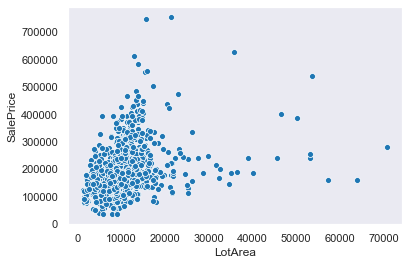

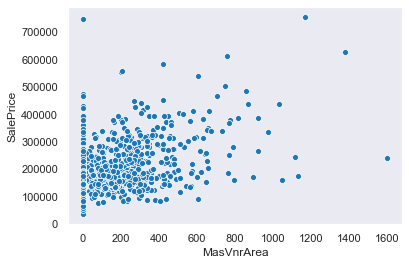

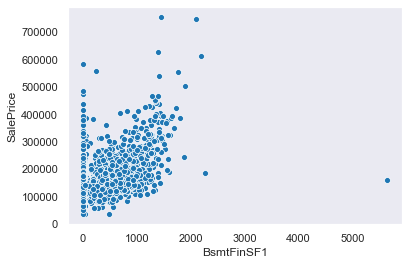

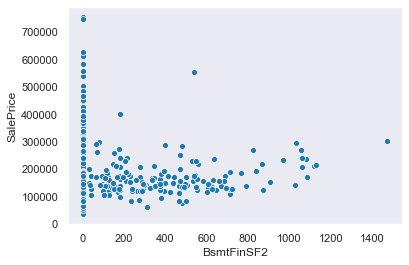

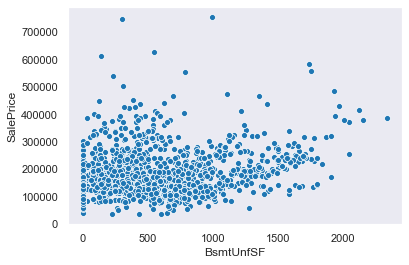

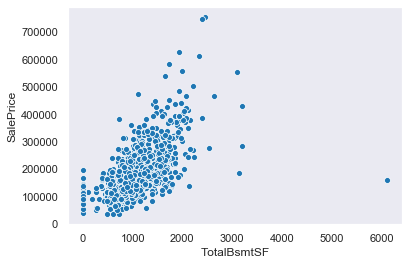

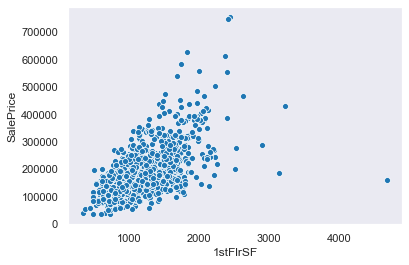

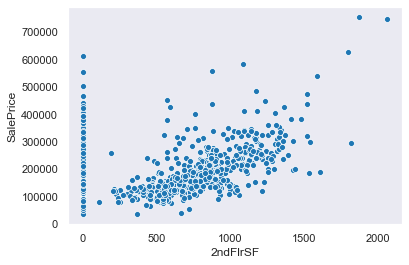

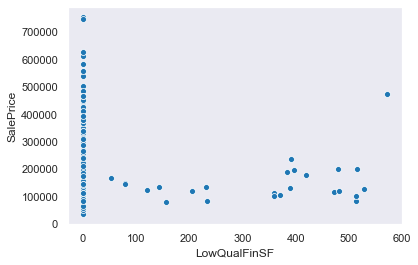

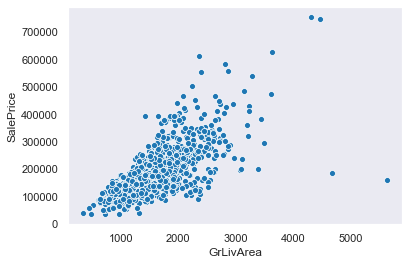

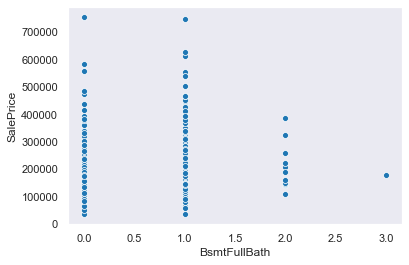

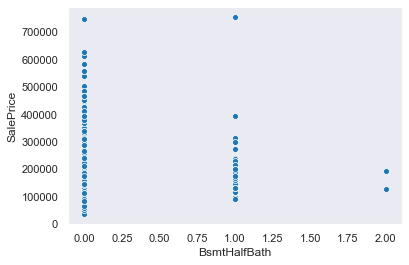

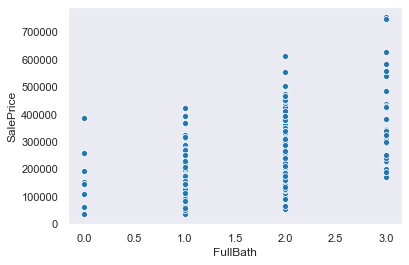

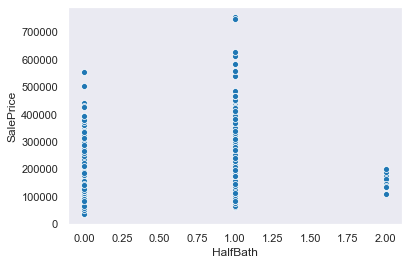

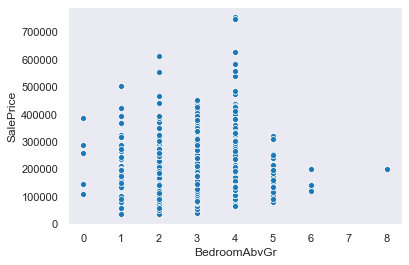

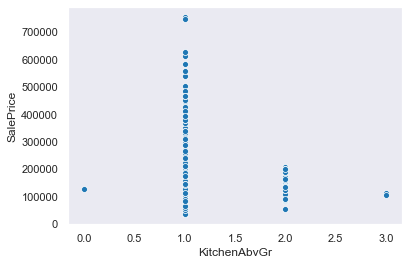

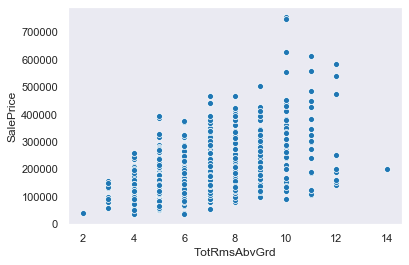

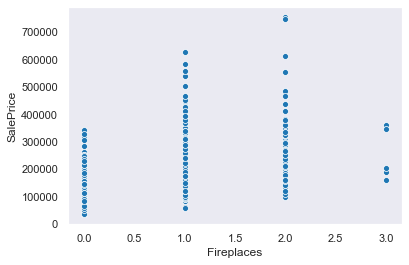

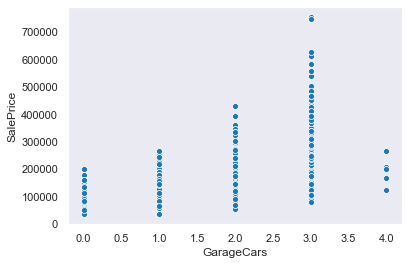

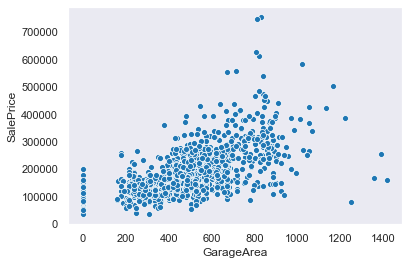

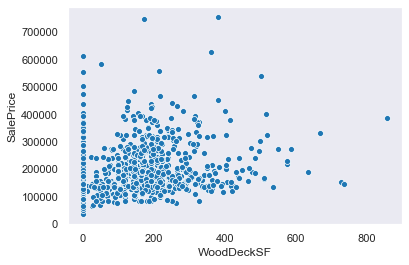

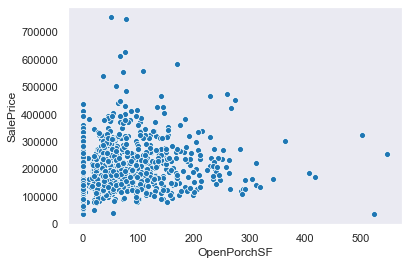

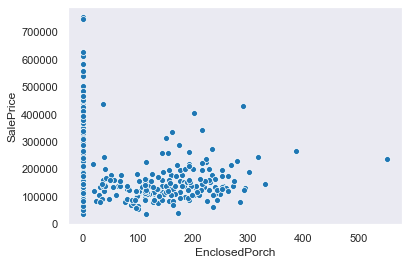

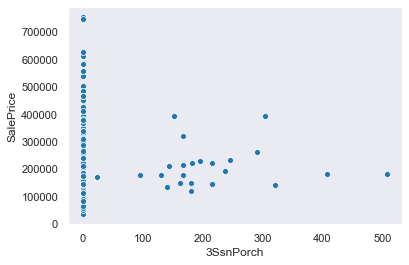

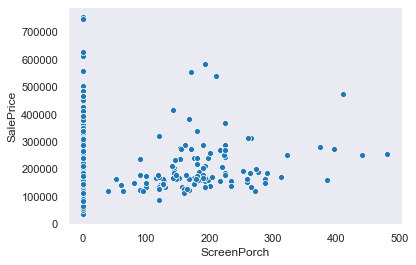

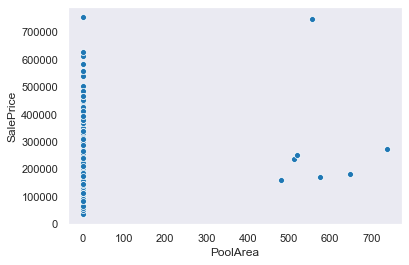

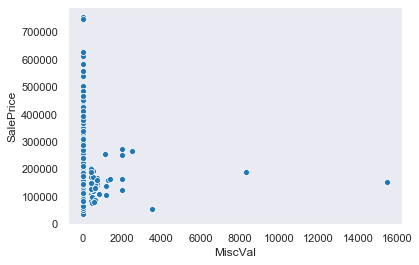

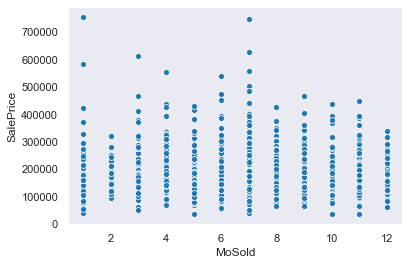

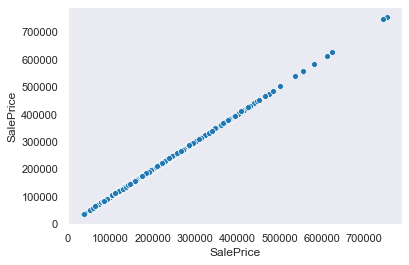

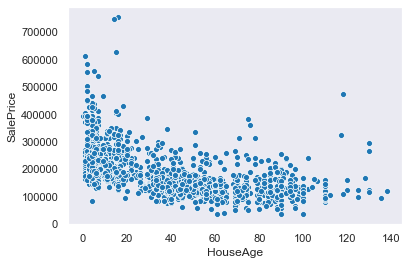

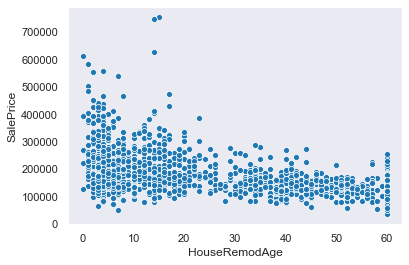

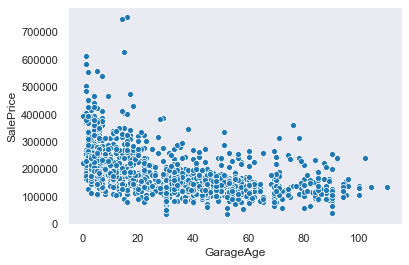

In [29]:
for col in num_cols:
    plt.subplots()
    scatterplot(col)

### Observations:
- "SalePrice" increases with increasing size of basement and 1st floor.
- Most houses do not have the 2nd floor, but if the house has 2nd floor, the "SalePrice" rises with increase in size of floor.
- Overall living area size impacts the Sale price.
- Having more than 2 full bathroom suggests increase in "SalePrice".
- As number of rooms in house increases, so does the price.
- Having a good Garage Area impacts the Sale price positively.
- Having parking for more cars shows good impact on the Sale price.
- Selling month has not much impact on sale price.
- Newer houses or newly remodelled houses tend to have higher prices than that of old houses.

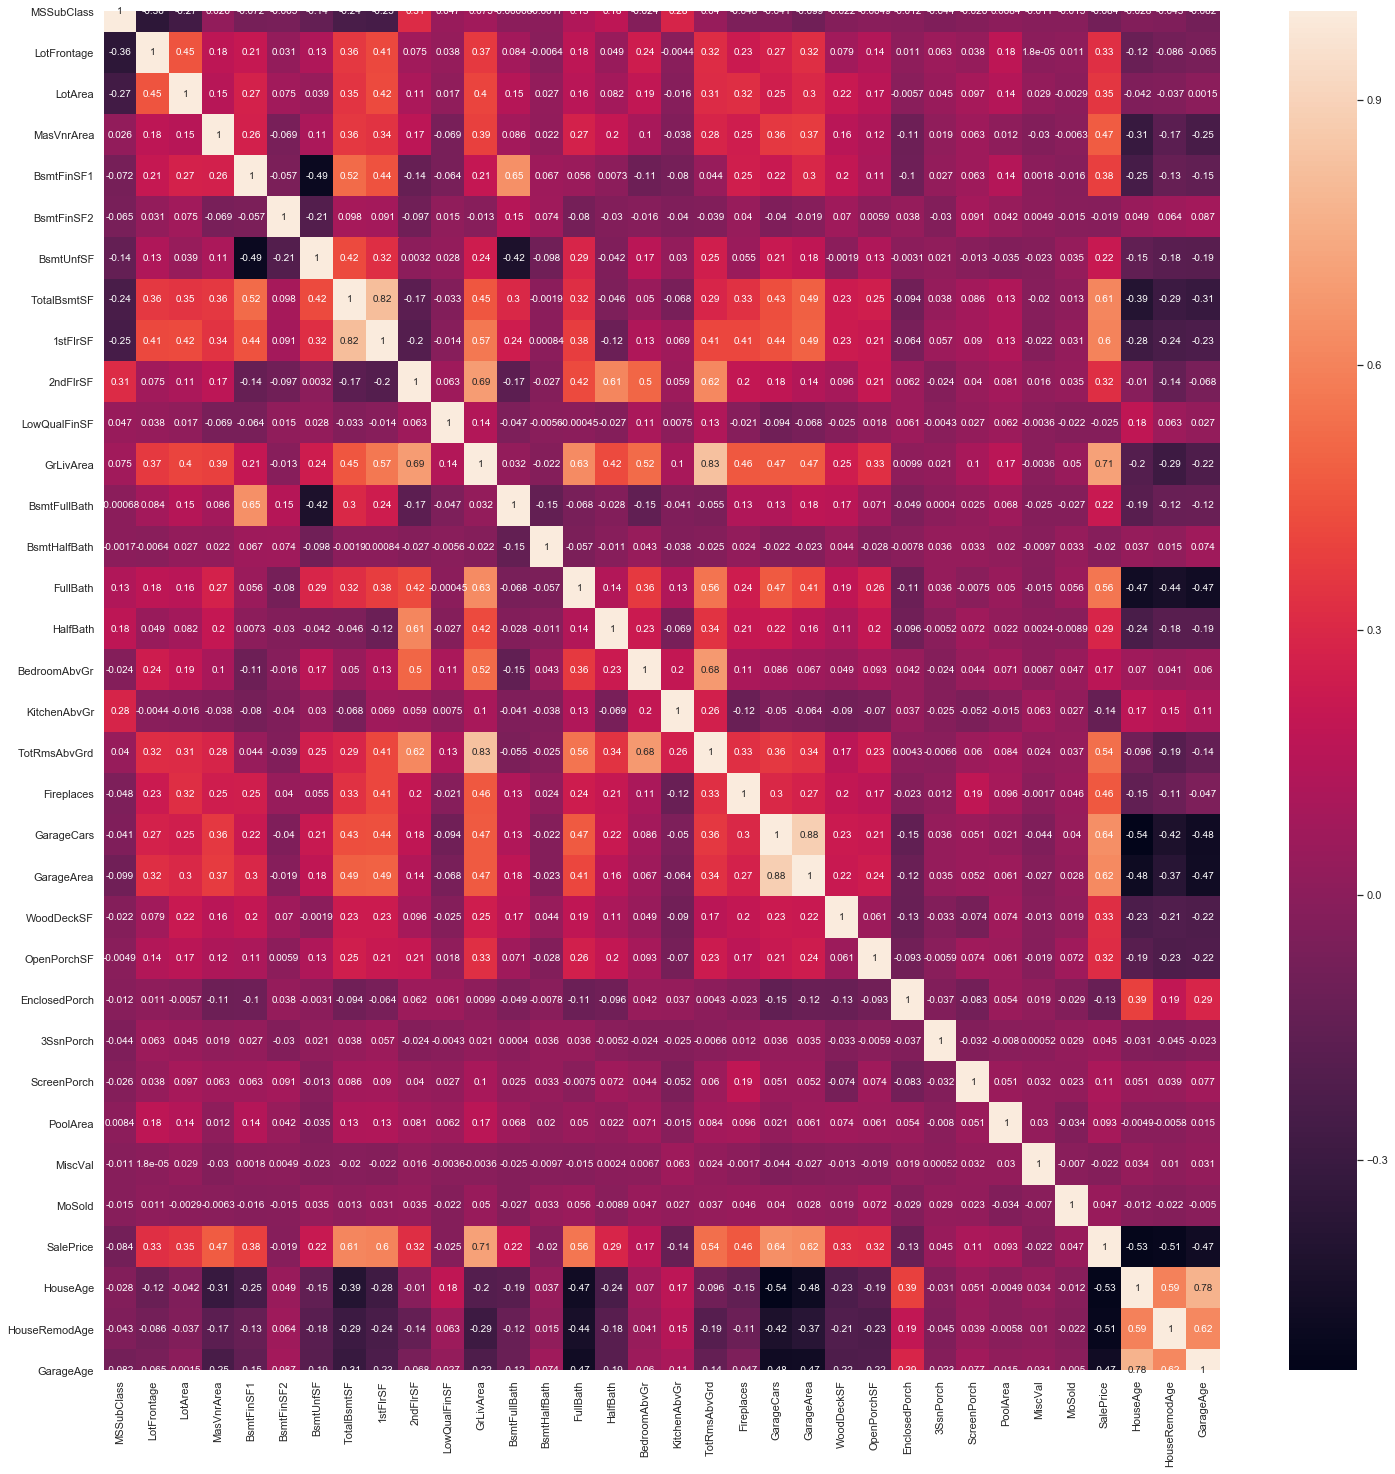

In [30]:
#Let's look at the correlation
plt.subplots(figsize=(25, 25))
sns.heatmap(houses.corr(), annot=True)

- "SalePrice" is highly correlated with "GrLivArea", "GarageCars", "TotalBsmtSF". <br>
- "GrLivArea" is highly correlated with "TotRmsAbvGrd"<br>
- "GarageCars" is highly correlated with "GarageArea"<br>
- "HouseAge" is highly correlated with "GarageAge"<br>
- "TotalBsmtSF" is highly correlated with "1stFlrSF"

In [31]:
cols = ["TotRmsAbvGrd", "GarageArea", "GarageAge", "1stFlrSF"]
houses = houses.drop(cols, axis = 1)

In [32]:
houses.shape

(1456, 70)

In [33]:
cat_cols = houses.select_dtypes(include = "object")
num_cols = houses.select_dtypes(exclude = "object")
print(len(cat_cols.columns), ", ", len(num_cols.columns))

40 ,  30


In [34]:
houses.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
CentralAir        object
Electrical        object
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64


In [35]:
houses1 = houses.copy()

In [36]:
#Now, we will use the LabelEncoder to transform categorical variables to find the skewness in the data.
for col in cat_cols:
    le = preprocessing.LabelEncoder()
    houses1[col] = le.fit_transform(houses1[col])

In [37]:
houses1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,HouseRemodAge
0,60,3,65.000,8450,1,3,3,4,0,5,2,0,5,2,0,1,12,13,1,196.000,2,4,2,2,4,3,2,706,6,0,150,856,0,1,4,854,0,1710,1,0,2,1,3,1,2,6,0,3,1,2,2,5,5,2,0,61,0,0,0,0,3,4,1,0,2,8,4,208500,7,7
1,20,3,80.000,9600,1,3,3,2,0,24,1,0,2,0,2,1,8,8,2,0.000,3,4,1,2,4,1,0,978,6,0,284,1262,0,1,4,0,0,1262,0,1,2,0,3,1,3,6,1,5,1,2,2,5,5,2,298,0,0,0,0,0,3,4,1,0,5,8,4,181500,34,34
2,60,3,68.000,11250,1,0,3,4,0,5,2,0,5,2,0,1,12,13,1,162.000,2,4,2,2,4,2,2,486,6,0,434,920,0,1,4,866,0,1786,1,0,2,1,3,1,2,6,1,5,1,2,2,5,5,2,0,42,0,0,0,0,3,4,1,0,9,8,4,223500,9,8
3,70,3,60.000,9550,1,0,3,0,0,6,2,0,5,2,0,1,13,15,2,0.000,3,4,0,4,1,3,0,216,6,0,540,756,2,1,4,756,0,1717,1,0,1,0,3,1,2,6,1,2,5,3,3,5,5,2,0,35,272,0,0,0,3,4,1,0,2,8,0,140000,95,40
4,60,3,84.000,14260,1,0,3,2,0,15,2,0,5,2,0,1,12,13,1,350.000,2,4,2,2,4,0,2,655,6,0,490,1145,0,1,4,1053,0,2198,1,0,2,1,4,1,2,6,1,5,1,2,3,5,5,2,192,84,0,0,0,0,3,4,1,0,12,8,4,250000,10,10


In [38]:
houses1.skew()

MSSubClass        1.404
MSZoning         -1.733
LotFrontage       2.413
LotArea           4.135
Alley            -0.322
LotShape         -0.614
LandContour      -3.189
LotConfig        -1.143
LandSlope         4.863
Neighborhood      0.040
Condition1        3.015
BldgType          2.243
HouseStyle        0.305
OverallQual       0.448
OverallCond       1.345
RoofStyle         1.475
Exterior1st      -0.727
Exterior2nd      -0.696
MasVnrType       -0.064
MasVnrArea        2.690
ExterQual        -1.829
ExterCond        -2.560
Foundation        0.087
BsmtQual         -0.500
BsmtCond         -2.937
BsmtExposure     -1.108
BsmtFinType1      0.109
BsmtFinSF1        1.700
BsmtFinType2     -3.191
BsmtFinSF2        4.287
BsmtUnfSF         0.919
TotalBsmtSF       1.536
HeatingQC         0.486
CentralAir       -3.524
Electrical       -3.058
2ndFlrSF          0.812
LowQualFinSF      8.999
GrLivArea         1.374
BsmtFullBath      0.581
BsmtHalfBath      4.129
FullBath          0.042
HalfBath        

We will consider the skewness between -1 and 1. We have to remove the columns having skew less than -1 and more than 1.

In [39]:
cols = []

for col in houses1.columns:
    if col != "SalePrice":
        if ((houses1[col].skew() <= -1) or (houses1[col].skew() >= 1)):
            cols.append(col)

In [40]:
len(cols)

43

In [41]:
#Now, let's drop the skewed cols from original data
houses = houses.drop(cols, axis=1)

In [42]:
houses.shape

(1456, 27)

In [43]:
cat_cols = houses.select_dtypes(include = "object")
num_cols = houses.select_dtypes(exclude = "object")
print(len(cat_cols.columns),", ", len(num_cols.columns))

15 ,  12


In [44]:
houses.head()

,Alley,LotShape,Neighborhood,HouseStyle,OverallQual,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtQual,BsmtFinType1,BsmtUnfSF,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,MoSold,SalePrice,HouseAge,HouseRemodAge
0,No Alley Access,Reg,CollgCr,2Story,Good,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,150,Ex,854,1,2,1,3,0,No Fireplace,Attchd,RFn,2,2,208500,7,7
1,No Alley Access,Reg,Veenker,1Story,Average,MetalSd,MetalSd,None,CBlock,Gd,ALQ,284,Ex,0,0,2,0,3,1,TA,Attchd,RFn,2,5,181500,34,34
2,No Alley Access,IR1,CollgCr,2Story,Good,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,434,Ex,866,1,2,1,3,1,TA,Attchd,RFn,2,9,223500,9,8
3,No Alley Access,IR1,Crawfor,2Story,Good,Wd Sdng,Wd Shng,None,BrkTil,TA,ALQ,540,Gd,756,1,1,0,3,1,Gd,Detchd,Unf,3,2,140000,95,40
4,No Alley Access,IR1,NoRidge,2Story,Good,VinylSd,VinylSd,BrkFace,PConc,Gd,GLQ,490,Ex,1053,1,2,1,4,1,TA,Attchd,RFn,3,12,250000,10,10


In [45]:
#getting dummy variables for categorical variables
dummies = pd.get_dummies(houses[cat_cols.columns], drop_first = True)
houses = pd.concat([houses, dummies], axis = 1)

In [46]:
houses.shape

(1456, 132)

In [47]:
#dropping the original categorical variables as we have the dummies for the same
houses = houses.drop(cat_cols.columns, axis = 1)

In [48]:
houses.shape

(1456, 117)

### Splitting the data for train and test

In [49]:
np.random.seed(42)
houses_train, houses_test = train_test_split(houses, train_size = 0.7, test_size = 0.3, random_state = 42)

#### Scaling the data

In [50]:
#let's scale the numerical features
sc = MinMaxScaler()
num_feats = list(num_cols.columns)
houses_train[num_feats] = sc.fit_transform(houses_train[num_feats])

In [51]:
houses_train.head()

,BsmtUnfSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,MoSold,SalePrice,HouseAge,HouseRemodAge,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
467,0.146,0.366,0.000,0.333,0.500,0.375,0.667,0.250,0.455,0.155,0.493,0.250,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
474,0.128,0.000,0.333,0.667,0.000,0.250,0.000,0.500,0.636,0.300,0.072,0.167,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1332,0.054,0.000,0.333,0.333,0.000,0.250,0.333,0.250,0.364,0.090,0.522,0.867,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
438,0.032,0.000,0.000,0.333,0.000,0.250,0.333,0.250,0.182,0.077,0.703,0.133,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1210,0.452,0.383,0.000,0.667,0.500,0.375,0.333,0.500,0.364,0.214,0.130,0.300,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [52]:
houses_test[num_feats] =sc.transform(houses_test[num_feats])
houses_test.head()

,BsmtUnfSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,MoSold,SalePrice,HouseAge,HouseRemodAge,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallQual_Very Poor,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
500,0.135,0.264,0.000,0.333,0.500,0.375,0.000,0.250,0.364,0.108,0.268,0.617,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1265,0.103,0.358,0.333,0.667,0.500,0.375,0.000,0.500,0.182,0.207,0.080,0.183,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
414,0.214,0.492,0.000,0.667,0.500,0.375,0.333,0.750,1.000,0.268,0.123,0.283,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1050,0.557,0.000,0.000,0.667,0.000,0.375,0.000,0.500,0.636,0.197,0.022,0.050,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1037,0.452,0.585,0.000,0.667,0.500,0.375,0.333,0.500,0.727,0.350,0.065,0.133,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


#### Splitting the independent and dependent variables for both train and test

In [53]:
y_train = houses_train.pop("SalePrice")
X_train = houses_train

y_test = houses_test.pop("SalePrice")
X_test = houses_test

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1019, 116), (1019,), (437, 116), (437,))

## Model 1

### Linear Regression Model

In [55]:
#Building Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lm.coef_

array([ 3.03664885e-02,  1.60413444e-01,  4.05776710e-02,  4.57230121e-02,
        1.48294552e-02,  4.03695952e-02,  6.85474734e-02,  1.19016233e-01,
        2.36279908e-03,  3.80542263e-02, -2.75039296e-02, -5.39649927e-04,
       -2.34075388e-03,  1.35437576e-02, -2.93394059e-02, -1.90226284e-03,
       -1.02595728e-02,  1.93313987e-02,  3.50698618e-02,  4.44123298e-02,
        3.87919878e-02,  6.88866495e-02, -7.71693147e-04,  2.14348933e-02,
        1.15761397e-02, -3.72749421e-03,  5.86147960e-03,  1.97272287e-02,
        8.96801504e-03,  1.93940933e-02,  1.38857250e-01,  5.96796474e-02,
        9.13726757e-03,  2.39318182e-02,  1.03409649e-02,  3.26070718e-02,
        4.24058212e-02,  8.80536825e-02,  4.62748297e-02,  5.85012232e-02,
        2.28951538e-02,  3.59491984e-02,  3.82753571e-03, -2.76413200e-02,
       -1.97117829e-02,  1.71951691e-02,  2.73449241e-02,  1.29819888e-01,
        2.66367244e-02, -7.40165347e-03, -3.92659782e-02,  5.06339599e+10,
       -3.76242251e-02,  

In [57]:
lm.intercept_

0.032703164592313844

In [58]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [59]:
#looking at different metrics to interpret the model
lm_r2_train = r2_score(y_train, y_pred_train)
lm_r2_test = r2_score(y_test, y_pred_test)

lm_mse_train = mean_squared_error(y_train, y_pred_train)
lm_mse_test = mean_squared_error(y_test, y_pred_test)

lm_rmse_train = lm_mse_train ** 0.5
lm_rmse_test = lm_mse_test ** 0.5

print("Train R2 score: ", lm_r2_train)
print("Test R2 score: ", lm_r2_test)

print("Train MSE: ", lm_mse_train)
print("Test MSE: ", lm_mse_test)

print("Train RMSE: ", lm_rmse_train)
print("Test RMSE: ", lm_rmse_test)

Train R2 score:  0.8544096882813155
Test R2 score:  -6.45358223515288e+20
Train MSE:  0.0018121750270184448
Test MSE:  7.301086595694862e+18
Train RMSE:  0.04256964912961399
Test RMSE:  2702052293.293907


In [60]:
# now, let's build a model using the Ridge and Lasso regularization respectively.
ridge = Ridge()
lasso = Lasso()

### Ridge

In [61]:
#Params for tuning the regularized model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [62]:
#using GridSearchCV with 5 folds to find the best alpha for model(ridge) 
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [63]:
model_cv.best_params_

{'alpha': 6.0}

In [64]:
#using the best alpha for our Ridge model
alpha = 6.0
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=6.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
ridge.coef_

array([ 2.59660832e-02,  9.40541919e-02,  3.74436015e-02,  5.50509290e-02,
        1.94901024e-02,  3.95577866e-02,  5.13176395e-02,  8.86625735e-02,
        2.89924603e-03,  7.70465491e-03, -2.80627065e-02,  8.29520131e-04,
       -1.56915973e-03,  1.81620498e-02, -1.94004423e-02, -6.75519712e-03,
       -7.71534244e-03, -1.51698876e-02,  2.35619109e-03,  1.27114459e-02,
        2.02967140e-03,  3.62494407e-02, -2.42645878e-02, -2.26474929e-02,
       -1.28495292e-02, -2.82621302e-02, -2.11761302e-02, -8.21294859e-03,
       -8.99256134e-03, -9.05069442e-03,  8.84318226e-02,  2.83002859e-02,
       -1.21590085e-02, -3.18002415e-03, -1.65352270e-02,  2.11176477e-03,
        4.42370867e-03,  5.60239402e-02,  1.08697571e-02,  1.56239881e-02,
        4.78660089e-03,  1.46228558e-02,  1.45301382e-02, -1.18396118e-02,
       -1.33739958e-02,  1.44762290e-03,  7.45777188e-03,  1.22058954e-01,
        2.58164510e-02, -1.09507581e-02, -1.03835965e-02,  0.00000000e+00,
       -1.69767335e-03,  

In [66]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [67]:
#looking at different metrics to interpret the model
ridge_r2_train = r2_score(y_train, y_pred_train)
ridge_r2_test = r2_score(y_test, y_pred_test)

ridge_mse_train = mean_squared_error(y_train, y_pred_train)
ridge_mse_test = mean_squared_error(y_test, y_pred_test)

ridge_rmse_train = ridge_mse_train ** 0.5
ridge_rmse_test = ridge_mse_test ** 0.5

print("Train R2 score: ", ridge_r2_train)
print("Test R2 score: ", ridge_r2_test)

print("Train MSE: ", ridge_mse_train)
print("Test MSE: ", ridge_mse_test)

print("Train RMSE: ", ridge_rmse_train)
print("Test RMSE: ", ridge_rmse_test)

Train R2 score:  0.8379595679706566
Test R2 score:  0.8248189525123734
Train MSE:  0.0020169310775173667
Test MSE:  0.0019818636394913743
Train RMSE:  0.04491025581665469
Test RMSE:  0.04451812708876435


### Lasso

In [68]:
#using GridSearchCV with 5 folds to find the best alpha for model(lasso) 
folds = 5

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [69]:
model_cv.best_params_

{'alpha': 0.0001}

In [70]:
#using the best alpha for our Lasso model
alpha = 0.0001
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
lasso.coef_

array([ 2.20019594e-02,  1.59513679e-01,  3.94205203e-02,  4.14251119e-02,
        6.90508032e-03,  4.09175557e-02,  6.90084177e-02,  1.08310435e-01,
        1.59457791e-04,  0.00000000e+00, -2.91439033e-02,  0.00000000e+00,
       -0.00000000e+00,  1.69724589e-02, -2.06050796e-02, -4.16682345e-03,
       -0.00000000e+00, -0.00000000e+00,  8.67857724e-03,  1.83695472e-02,
        1.00115886e-02,  4.92581430e-02, -1.63330401e-02, -7.90042768e-03,
       -1.85536039e-03, -1.95060291e-02, -1.37534686e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.07373062e-01,  3.35999185e-02,
       -4.78109139e-03,  0.00000000e+00, -6.94714525e-03,  8.53900334e-03,
        1.22921192e-02,  7.56052146e-02,  1.55654244e-02,  2.04331181e-02,
        9.11701162e-03,  2.60424474e-02,  0.00000000e+00, -2.20572377e-02,
       -2.47649016e-02,  3.72438173e-03,  1.32928546e-02,  1.38638945e-01,
        2.71907699e-02, -9.17442286e-03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [72]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [73]:
#looking at different metrics to interpret the model
lasso_r2_train = r2_score(y_train, y_pred_train)
lasso_r2_test = r2_score(y_test, y_pred_test)

lasso_mse_train = mean_squared_error(y_train, y_pred_train)
lasso_mse_test = mean_squared_error(y_test, y_pred_test)

lasso_rmse_train = lasso_mse_train ** 0.5
lasso_rmse_test = lasso_mse_test ** 0.5

print("Train R2 score: ", lasso_r2_train)
print("Test R2 score: ", lasso_r2_test)

print("Train MSE: ", lasso_mse_train)
print("Test MSE: ", lasso_mse_test)

print("Train RMSE: ", lasso_rmse_train)
print("Test RMSE: ", lasso_rmse_test)

Train R2 score:  0.8435972774431357
Test R2 score:  0.8185173337677819
Train MSE:  0.001946758026886411
Test MSE:  0.002053155307391266
Train RMSE:  0.044122080944651865
Test RMSE:  0.04531175683408519


###### As lasso does the feature selection, let's use the feature selected by the lasso model to build another model.

In [74]:
coefs = X_train.columns[(lasso.coef_) > 0]

In [75]:
coefs

Index(['BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'LotShape_IR2', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'OverallQual_Excellent', 'OverallQual_Good', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_ImStucc', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn'],
      dtype='object')

In [76]:
len(coefs)

43

In [77]:
X_train = X_train[coefs]
X_test = X_test[coefs]

## Model 2

### Linear Regression

In [78]:
#Building Linear Regression Model
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print(lm1.coef_)
print(lm1.intercept_)

[ 0.03028224  0.16506828  0.06318429  0.057274    0.01538324  0.05319342
  0.06075837  0.10160102  0.00182492  0.02642318  0.02325117  0.03189382
  0.02231299  0.06192506  0.11699798  0.06363451  0.01696465  0.02695004
  0.09940478  0.03854704  0.04648481  0.0337432   0.0523987   0.03114837
  0.03916526  0.16754961  0.02872347  0.03081049  0.00351332 -0.00062987
  0.08752216  0.03171139 -0.00073823  0.01127509  0.00065776  0.0162193
  0.01564045  0.01508271  0.00798126  0.022909    0.01678207  0.03079788
  0.01541826]
-0.05264727498555802


In [80]:
y_pred_train = lm1.predict(X_train)
y_pred_test = lm1.predict(X_test)

In [81]:
#looking at different metrics to interpret the model
lm1_r2_train = r2_score(y_train, y_pred_train)
lm1_r2_test = r2_score(y_test, y_pred_test)

lm1_mse_train = mean_squared_error(y_train, y_pred_train)
lm1_mse_test = mean_squared_error(y_test, y_pred_test)

lm1_rmse_train = lm_mse_train ** 0.5
lm1_rmse_test = lm_mse_test ** 0.5

print("Train R2 score: ", lm1_r2_train)
print("Test R2 score: ", lm1_r2_test)

print("Train MSE: ", lm1_mse_train)
print("Test MSE: ", lm1_mse_test)

print("Train RMSE: ", lm1_rmse_train)
print("Test RMSE: ", lm1_rmse_test)

Train R2 score:  0.8172419105113412
Test R2 score:  0.7997272563841383
Train MSE:  0.0022748055268738444
Test MSE:  0.0022657317914570024
Train RMSE:  0.04256964912961399
Test RMSE:  2702052293.293907


In [82]:
#using GridSearchCV with 5 folds to find the best alpha for model(ridge) 
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=6.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [83]:
model_cv.best_params_

{'alpha': 2.0}

In [84]:
#using the best alpha for our Ridge model
alpha = 2.0
ridge1 = Ridge(alpha = alpha)

ridge1.fit(X_train, y_train)

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
ridge1.coef_

array([ 0.02655977,  0.12567243,  0.05900976,  0.06280646,  0.01863054,
        0.04823726,  0.06356457,  0.09995189,  0.00261619,  0.02514626,
        0.01933276,  0.02857741,  0.0182114 ,  0.05849591,  0.10908811,
        0.05757017,  0.0137794 ,  0.0211491 ,  0.08638155,  0.03430815,
        0.03617309,  0.01696296,  0.03908841,  0.01576022,  0.02593339,
        0.16349741,  0.02983018,  0.02904759,  0.00454777, -0.00065159,
        0.04384949,  0.02820897, -0.00041965,  0.01042587, -0.00019511,
        0.01643621,  0.01383615,  0.01549824,  0.00743436,  0.02460357,
        0.01729977,  0.02629102,  0.02007847])

In [86]:
y_pred_train = ridge1.predict(X_train)
y_pred_test = ridge1.predict(X_test)

In [87]:
#looking at different metrics to interpret the model
ridge1_r2_train = r2_score(y_train, y_pred_train)
ridge1_r2_test = r2_score(y_test, y_pred_test)

ridge1_mse_train = mean_squared_error(y_train, y_pred_train)
ridge1_mse_test = mean_squared_error(y_test, y_pred_test)

ridge1_rmse_train = ridge1_mse_train ** 0.5
ridge1_rmse_test = ridge1_mse_test ** 0.5

print("Train R2 score: ", ridge1_r2_train)
print("Test R2 score: ", ridge1_r2_test)

print("Train MSE: ", ridge1_mse_train)
print("Test MSE: ", ridge1_mse_test)

print("Train RMSE: ", ridge1_rmse_train)
print("Test RMSE: ", ridge1_rmse_test)

Train R2 score:  0.8152402522500158
Test R2 score:  0.804280373519229
Train MSE:  0.0022997203379692974
Test MSE:  0.0022142213259940154
Train RMSE:  0.04795539946626758
Test RMSE:  0.047055513236963165


In [88]:
#using GridSearchCV with 5 folds to find the best alpha for model(lasso) 
folds = 5

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [89]:
model_cv.best_params_

{'alpha': 0.0001}

In [90]:
#using the best alpha for our Lasso model
alpha = 0.0001
lasso1 = Lasso(alpha = alpha)

lasso1.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
lasso1.coef_

array([ 0.02315567,  0.14041527,  0.05918671,  0.0588658 ,  0.01215372,
        0.04056229,  0.0632897 ,  0.10367622,  0.00062969,  0.0228057 ,
        0.01706987,  0.02523512,  0.01749666,  0.05816941,  0.11191847,
        0.05555212,  0.01130117,  0.02030503,  0.08872754,  0.03237654,
        0.03112651,  0.01083078,  0.04172896,  0.01391229,  0.02705761,
        0.17151853,  0.03113823,  0.02794718,  0.00155377, -0.        ,
        0.03435667,  0.0178901 , -0.        ,  0.00917901, -0.        ,
        0.01502294,  0.01343364,  0.01470076,  0.00589814,  0.02315714,
        0.0172123 ,  0.02308502,  0.01746075])

In [92]:
y_pred_train = lasso1.predict(X_train)
y_pred_test = lasso1.predict(X_test)

In [93]:
#looking at different metrics to interpret the model
lasso1_r2_train = r2_score(y_train, y_pred_train)
lasso1_r2_test = r2_score(y_test, y_pred_test)

lasso1_mse_train = mean_squared_error(y_train, y_pred_train)
lasso1_mse_test = mean_squared_error(y_test, y_pred_test)

lasso1_rmse_train = lasso1_mse_train ** 0.5
lasso1_rmse_test = lasso1_mse_test ** 0.5

print("Train R2 score: ", lasso1_r2_train)
print("Test R2 score: ", lasso1_r2_test)

print("Train MSE: ", lasso1_mse_train)
print("Test MSE: ", lasso1_mse_test)

print("Train RMSE: ", lasso1_rmse_train)
print("Test RMSE: ", lasso1_rmse_test)

Train R2 score:  0.815067508157345
Test R2 score:  0.801643614774722
Train MSE:  0.0023018704984237096
Test MSE:  0.0022440515864976143
Train RMSE:  0.047977812563972835
Test RMSE:  0.04737142162208787


##### Let's again look at the features selected by the lasso, and build model using it.

In [94]:
coefs = X_train.columns[(lasso1.coef_) > 0]

In [95]:
coefs

Index(['BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'LotShape_IR2', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'OverallQual_Excellent', 'OverallQual_Good', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_Stone', 'Exterior2nd_ImStucc', 'Exterior2nd_Wd Sdng', 'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn'],
      dtype='object')

In [96]:
len(coefs)

40

In [97]:
X_train = X_train[coefs]
X_test = X_test[coefs]

## Model 3

### Linear Regression

In [98]:
#Building Linear Regression Model
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
print(lm2.coef_)
print(lm2.intercept_)

[0.03025993 0.16530113 0.06317694 0.05673088 0.01509425 0.05292331
 0.06060397 0.10130041 0.00187963 0.02648153 0.02321242 0.03164391
 0.02238063 0.06187679 0.1169603  0.06360717 0.0168533  0.02708445
 0.09955151 0.0385452  0.0463624  0.03367981 0.05226529 0.03079694
 0.03890002 0.16761746 0.02872797 0.03116661 0.00368134 0.08800617
 0.0317787  0.0114597  0.01597236 0.01543922 0.01514197 0.00790447
 0.02285449 0.01668562 0.03064555 0.01540016]
-0.05163156085051576


In [100]:
y_pred_train = lm2.predict(X_train)
y_pred_test = lm2.predict(X_test)

In [101]:
#looking at different metrics to interpret the model
lm2_r2_train = r2_score(y_train, y_pred_train)
lm2_r2_test = r2_score(y_test, y_pred_test)

lm2_mse_train = mean_squared_error(y_train, y_pred_train)
lm2_mse_test = mean_squared_error(y_test, y_pred_test)

lm2_rmse_train = lm2_mse_train ** 0.5
lm2_rmse_test = lm2_mse_test ** 0.5

print("Train R2 score: ", lm2_r2_train)
print("Test R2 score: ", lm2_r2_test)

print("Train MSE: ", lm2_mse_train)
print("Test MSE: ", lm2_mse_test)

print("Train RMSE: ", lm2_rmse_train)
print("Test RMSE: ", lm2_rmse_test)

Train R2 score:  0.8172290272360956
Test R2 score:  0.7999335145721385
Train MSE:  0.002274965886099611
Test MSE:  0.002263398344951187
Train RMSE:  0.047696602458661676
Test RMSE:  0.04757518623138734


In [102]:
#using GridSearchCV with 5 folds to find the best alpha for model(ridge) 
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=6.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [103]:
model_cv.best_params_

{'alpha': 2.0}

In [104]:
#using the best alpha for our Ridge model
alpha = 2.0
ridge1 = Ridge(alpha = alpha)

ridge1.fit(X_train, y_train)

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
ridge1.coef_

array([0.02664331, 0.12571251, 0.05894108, 0.06262985, 0.0185816 ,
       0.04822156, 0.06346011, 0.0999109 , 0.00266207, 0.02512199,
       0.0193384 , 0.02830375, 0.01828083, 0.05848797, 0.10923336,
       0.05765431, 0.01363949, 0.02116162, 0.08641253, 0.03442535,
       0.03592514, 0.01691176, 0.03904611, 0.01565859, 0.02592658,
       0.16358895, 0.029878  , 0.02908159, 0.00459121, 0.04386841,
       0.02812644, 0.01054192, 0.01657946, 0.01382511, 0.01557302,
       0.00742752, 0.02463849, 0.01730279, 0.02627268, 0.02011874])

In [106]:
y_pred_train = ridge1.predict(X_train)
y_pred_test = ridge1.predict(X_test)

In [107]:
#looking at different metrics to interpret the model
ridge1_r2_train = r2_score(y_train, y_pred_train)
ridge1_r2_test = r2_score(y_test, y_pred_test)

In [108]:
ridge1_mse_train = mean_squared_error(y_train, y_pred_train)
ridge1_mse_test = mean_squared_error(y_test, y_pred_test)

ridge1_rmse_train = ridge1_mse_train ** 0.5
ridge1_rmse_test = ridge1_mse_test ** 0.5

print("Train R2 score: ", ridge1_r2_train)
print("Test R2 score: ", ridge1_r2_test)

print("Train MSE: ", ridge1_mse_train)
print("Test MSE: ", ridge1_mse_test)

print("Train RMSE: ", ridge1_rmse_train)
print("Test RMSE: ", ridge1_rmse_test)

Train R2 score:  0.8152369354582643
Test R2 score:  0.8043554167182827
Train MSE:  0.0022997616223591104
Test MSE:  0.002213372344955663
Train RMSE:  0.04795582991002356
Test RMSE:  0.04704649131397221


In [109]:
#using GridSearchCV with 5 folds to find the best alpha for model(lasso) 
folds = 5

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [110]:
model_cv.best_params_

{'alpha': 0.0001}

In [111]:
#using the best alpha for our Lasso model
alpha = 0.0001
lasso1 = Lasso(alpha = alpha)

lasso1.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
lasso1.coef_

array([0.02315532, 0.14040656, 0.05918691, 0.05886594, 0.01215321,
       0.04056339, 0.06328972, 0.10367645, 0.00062972, 0.02280561,
       0.01706953, 0.02523537, 0.01749662, 0.05816954, 0.11191911,
       0.05555163, 0.0113013 , 0.02030479, 0.08872739, 0.03237652,
       0.03112678, 0.0108277 , 0.04172575, 0.01390941, 0.02705494,
       0.17151959, 0.03113867, 0.02794722, 0.00155375, 0.03435636,
       0.01789032, 0.00917892, 0.01502281, 0.0134335 , 0.01470062,
       0.0058981 , 0.02315704, 0.01721253, 0.02308503, 0.01746225])

In [113]:
y_pred_train = lasso1.predict(X_train)
y_pred_test = lasso1.predict(X_test)

In [114]:
#looking at different metrics to interpret the model
lasso1_r2_train = r2_score(y_train, y_pred_train)
lasso1_r2_test = r2_score(y_test, y_pred_test)

In [115]:
lasso1_mse_train = mean_squared_error(y_train, y_pred_train)
lasso1_mse_test = mean_squared_error(y_test, y_pred_test)

lasso1_rmse_train = lasso1_mse_train ** 0.5
lasso1_rmse_test = lasso1_mse_test ** 0.5

print("Train R2 score: ", lasso1_r2_train)
print("Test R2 score: ", lasso1_r2_test)

print("Train MSE: ", lasso1_mse_train)
print("Test MSE: ", lasso1_mse_test)

print("Train RMSE: ", lasso1_rmse_train)
print("Test RMSE: ", lasso1_rmse_test)

Train R2 score:  0.815067232103945
Test R2 score:  0.8016441106278471
Train MSE:  0.0023018739344839224
Test MSE:  0.002244045976796718
Train RMSE:  0.047977848372805575
Test RMSE:  0.04737136241229207


In [116]:
coefs = X_train.columns[(lasso1.coef_) > 0]

In [117]:
len(coefs)

40

- ##### Lasso is not removing any feature.

### Now, let's use RFE to select the top 15 features to make the model simpler.

In [118]:
lm = LinearRegression()
rfe = RFE(lm, 15, step = 1)
rfe_select = rfe.fit(X_train, y_train)

In [119]:
rfe_rank = pd.DataFrame({'rank' : rfe_select.ranking_, 'support' : rfe_select.support_, 'features' : X_train.columns}).sort_values(by = 'rank', ascending = True)

selected_feat = rfe_rank.loc[rfe_rank['rank'] == 1, 'features'].values
selected_feat

array(['Exterior1st_Stone', 'Neighborhood_NridgHt',
       'Neighborhood_NoRidge', 'Neighborhood_Crawfor', 'OverallQual_Good',
       'Neighborhood_Veenker', 'Neighborhood_StoneBr',
       'OverallQual_Excellent', 'Exterior2nd_ImStucc', 'Fireplaces',
       'BedroomAbvGr', 'FullBath', 'BsmtFullBath', '2ndFlrSF',
       'GarageCars'], dtype=object)

In [120]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

### Model 4

### Linear Regression

In [121]:
#Building Linear Regression Model
lm3 = LinearRegression()
lm3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
print(lm3.coef_)
print(lm3.intercept_)

[0.08775354 0.05243309 0.11454011 0.04844244 0.05043522 0.04788512
 0.08949373 0.19395863 0.03680155 0.07457749 0.05798874 0.09510699
 0.08401377 0.03668539 0.13580918]
0.004503336671979913


In [123]:
y_pred_train = lm3.predict(X_train)
y_pred_test = lm3.predict(X_test)

In [124]:
#looking at different metrics to interpret the model
lm3_r2_train = r2_score(y_train, y_pred_train)
lm3_r2_test = r2_score(y_test, y_pred_test)

lm3_mse_train = mean_squared_error(y_train, y_pred_train)
lm3_mse_test = mean_squared_error(y_test, y_pred_test)

lm3_rmse_train = lm3_mse_train ** 0.5
lm3_rmse_test = lm3_mse_test ** 0.5

print("Train R2 score: ", lm3_r2_train)
print("Test R2 score: ", lm3_r2_test)

print("Train MSE: ", lm3_mse_train)
print("Test MSE: ", lm3_mse_test)

print("Train RMSE: ", lm3_rmse_train)
print("Test RMSE: ", lm3_rmse_test)

Train R2 score:  0.7760584774257221
Test R2 score:  0.7840152787200115
Train MSE:  0.0027874192309288942
Test MSE:  0.0024434850226633226
Train RMSE:  0.05279601529404368
Test RMSE:  0.049431619664576265


In [125]:
lm_metric = [lm3_r2_train, lm3_r2_test, lm3_mse_train, lm3_mse_test, lm3_rmse_train, lm3_rmse_test]

### Ridge

In [126]:
#using GridSearchCV with 5 folds to find the best alpha for model(ridge) 
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=6.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [127]:
model_cv.best_params_

{'alpha': 3.0}

In [128]:
#using the best alpha for our Ridge model
alpha = 3.0
ridge3 = Ridge(alpha = alpha)

ridge3.fit(X_train, y_train)

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [129]:
ridge3.coef_

array([0.03501211, 0.05409999, 0.10475596, 0.04407106, 0.05087128,
       0.0345887 , 0.07872236, 0.18252795, 0.02927905, 0.07641294,
       0.03990497, 0.09304017, 0.0791394 , 0.04096869, 0.13077474])

In [130]:
y_pred_train = ridge3.predict(X_train)
y_pred_test = ridge3.predict(X_test)

In [131]:
#looking at different metrics to interpret the model
ridge3_r2_train = r2_score(y_train, y_pred_train)
ridge3_r2_test = r2_score(y_test, y_pred_test)

ridge3_mse_train = mean_squared_error(y_train, y_pred_train)
ridge3_mse_test = mean_squared_error(y_test, y_pred_test)

ridge3_rmse_train = ridge3_mse_train ** 0.5
ridge3_rmse_test = ridge3_mse_test ** 0.5

print("Train R2 score: ", ridge3_r2_train)
print("Test R2 score: ", ridge3_r2_test)

print("Train MSE: ", ridge3_mse_train)
print("Test MSE: ", ridge3_mse_test)

print("Train RMSE: ", ridge3_rmse_train)
print("Test RMSE: ", ridge3_rmse_test)

Train R2 score:  0.7741169090057016
Test R2 score:  0.7859782453158913
Train MSE:  0.0028115860986447022
Test MSE:  0.002421277528315595
Train RMSE:  0.05302439154431385
Test RMSE:  0.04920647851975993


In [132]:
ridge_metric = [ridge3_r2_train, ridge3_r2_test, ridge3_mse_train, ridge3_mse_test, ridge3_rmse_train, ridge3_rmse_test]

In [133]:
#using GridSearchCV with 5 folds to find the best alpha for model(lasso) 
folds = 5

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [134]:
model_cv.best_params_

{'alpha': 0.0001}

In [135]:
#using the best alpha for our Lasso model
alpha = 0.0001
lasso3 = Lasso(alpha = alpha)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [136]:
lasso3.coef_

array([0.03566576, 0.04928528, 0.11187051, 0.04614739, 0.05071426,
       0.03348461, 0.08256621, 0.19440247, 0.0217909 , 0.07527302,
       0.04362741, 0.09533159, 0.08095744, 0.03713742, 0.13588321])

In [137]:
y_pred_train = lasso3.predict(X_train)
y_pred_test = lasso3.predict(X_test)

In [138]:
#looking at different metrics to interpret the model
lasso3_r2_train = r2_score(y_train, y_pred_train)
lasso3_r2_test = r2_score(y_test, y_pred_test)

lasso3_mse_train = mean_squared_error(y_train, y_pred_train)
lasso3_mse_test = mean_squared_error(y_test, y_pred_test)

lasso3_rmse_train = lasso3_mse_train ** 0.5
lasso3_rmse_test = lasso3_mse_test ** 0.5

print("Train R2 score: ", lasso3_r2_train)
print("Test R2 score: ", lasso3_r2_test)

print("Train MSE: ", lasso3_mse_train)
print("Test MSE: ", lasso3_mse_test)

print("Train RMSE: ", lasso3_rmse_train)
print("Test RMSE: ", lasso3_rmse_test)

Train R2 score:  0.775160531814845
Test R2 score:  0.7848205799508118
Train MSE:  0.0027985960365311553
Test MSE:  0.0024343744638954086
Train RMSE:  0.05290175835008847
Test RMSE:  0.04933938045715013


In [139]:
lasso_metric = [lasso3_r2_train, lasso3_r2_test, lasso3_mse_train, lasso3_mse_test, lasso3_rmse_train, lasso3_rmse_test]

### Comparing the Linear Regression, Ridge and Lasso model parameters and metric

In [140]:
lm_coef = lm3.coef_
ridge_coef = ridge3.coef_
lasso_coef = lasso3.coef_

In [141]:
metric = pd.DataFrame({"Metric" : ["Train R2", "Test R2", "Train MSE", "Test MSE", "Train RMSE", "Test RMSE"],
                      "Linear Regression" : lm_metric,
                      "Ridge" : ridge_metric,
                      "Lasso" : lasso_metric})

model = pd.DataFrame({"Feature" : X_train.columns,
                     "LRM" : lm_coef,
                     "Ridge" : ridge_coef,
                     "Lasso" : lasso_coef})

In [142]:
metric

,Metric,Linear Regression,Ridge,Lasso
0,Train R2,0.776,0.774,0.775
1,Test R2,0.784,0.786,0.785
2,Train MSE,0.003,0.003,0.003
3,Test MSE,0.002,0.002,0.002
4,Train RMSE,0.053,0.053,0.053
5,Test RMSE,0.049,0.049,0.049


In [143]:
model

,Feature,LRM,Ridge,Lasso
0,Exterior1st_Stone,0.088,0.035,0.036
1,Neighborhood_NridgHt,0.052,0.054,0.049
2,Neighborhood_NoRidge,0.115,0.105,0.112
3,Neighborhood_Crawfor,0.048,0.044,0.046
4,OverallQual_Good,0.050,0.051,0.051
5,Neighborhood_Veenker,0.048,0.035,0.033
6,Neighborhood_StoneBr,0.089,0.079,0.083
7,OverallQual_Excellent,0.194,0.183,0.194
8,Exterior2nd_ImStucc,0.037,0.029,0.022
9,Fireplaces,0.075,0.076,0.075


In [144]:
model = model.sort_values(by = "Ridge", ascending = False)

In [145]:
model

,Feature,LRM,Ridge,Lasso
7,OverallQual_Excellent,0.194,0.183,0.194
14,GarageCars,0.136,0.131,0.136
2,Neighborhood_NoRidge,0.115,0.105,0.112
11,FullBath,0.095,0.093,0.095
12,BsmtFullBath,0.084,0.079,0.081
6,Neighborhood_StoneBr,0.089,0.079,0.083
9,Fireplaces,0.075,0.076,0.075
1,Neighborhood_NridgHt,0.052,0.054,0.049
4,OverallQual_Good,0.050,0.051,0.051
3,Neighborhood_Crawfor,0.048,0.044,0.046


### Residual Analysis

In [146]:
y_pred_train = lm3.predict(X_train)

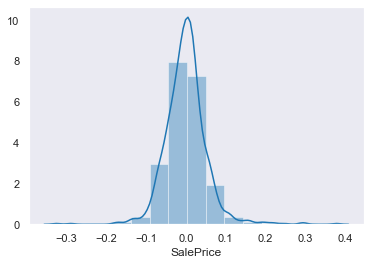

In [147]:
sns.distplot(y_train - y_pred_train, bins = 15)

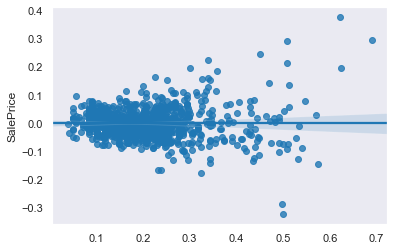

In [148]:
sns.regplot(y_pred_train, y_train - y_pred_train)

- Residuals follow normal distribution  around mean 0.
- There is no visible pattern in the residuals plot.

##### From the above two plots, we can say, our model does not violates any assumptions of linear regression.

### Model Evaluation

In [149]:
y_pred_test = lm3.predict(X_test)

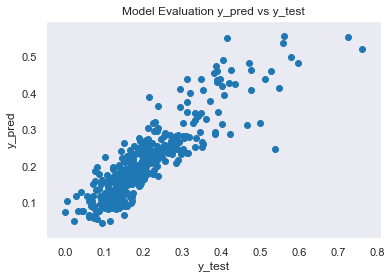

In [150]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Model Evaluation y_pred vs y_test")
plt.show()

### Final Model

All the models have almost similar metrics, but as lasso does feature selection and avoids overfitting, we will choose lasso model. 

In [151]:
#building model
alpha = 0.0001
lasso = Lasso(alpha = alpha)

#fitting model
lasso.fit(X_train, y_train)

#predicting house prices
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

#looking at r2 score(metric)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)

Train R2 Score: 0.775160531814845
Test R2 Score: 0.7848205799508118


In [152]:
model[["Feature", "Lasso"]].head()

,Feature,Lasso
7,OverallQual_Excellent,0.194
14,GarageCars,0.136
2,Neighborhood_NoRidge,0.112
11,FullBath,0.095
12,BsmtFullBath,0.081


### Top 5 significant features impacting house prices are:
1. #### OverallQual_Excellent
2. #### GarageCars
3. #### Neighborhood_NoRidge
4. #### FullBath
5. #### Neighborhood_StoneBr

### Best Alpha values : 
- #### Ridge - 3.0
- #### Lasso - 0.0001